In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,normalize 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

In [3]:
ds=pd.read_csv(r"C:\Users\Varshini\Downloads\dataset.csv") 

In [4]:
ds.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
ds.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
ds.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<AxesSubplot:>

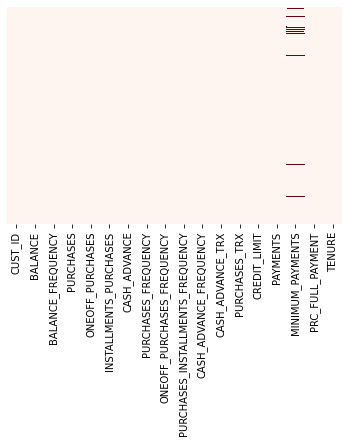

In [10]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='Reds') 

In [11]:
ds.isnull().sum() 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
ds.loc[(ds['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=ds['MINIMUM_PAYMENTS'].mean() 
ds.loc[(ds['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=ds['CREDIT_LIMIT'].mean() 

In [13]:
ds.duplicated().sum()

0

In [14]:
ds.head() 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
ds.drop("CUST_ID",axis =1,inplace =True)

In [16]:
n=len(ds.columns) 
n 

17

In [17]:
import warnings 
from warnings import filterwarnings 
filterwarnings("ignore")

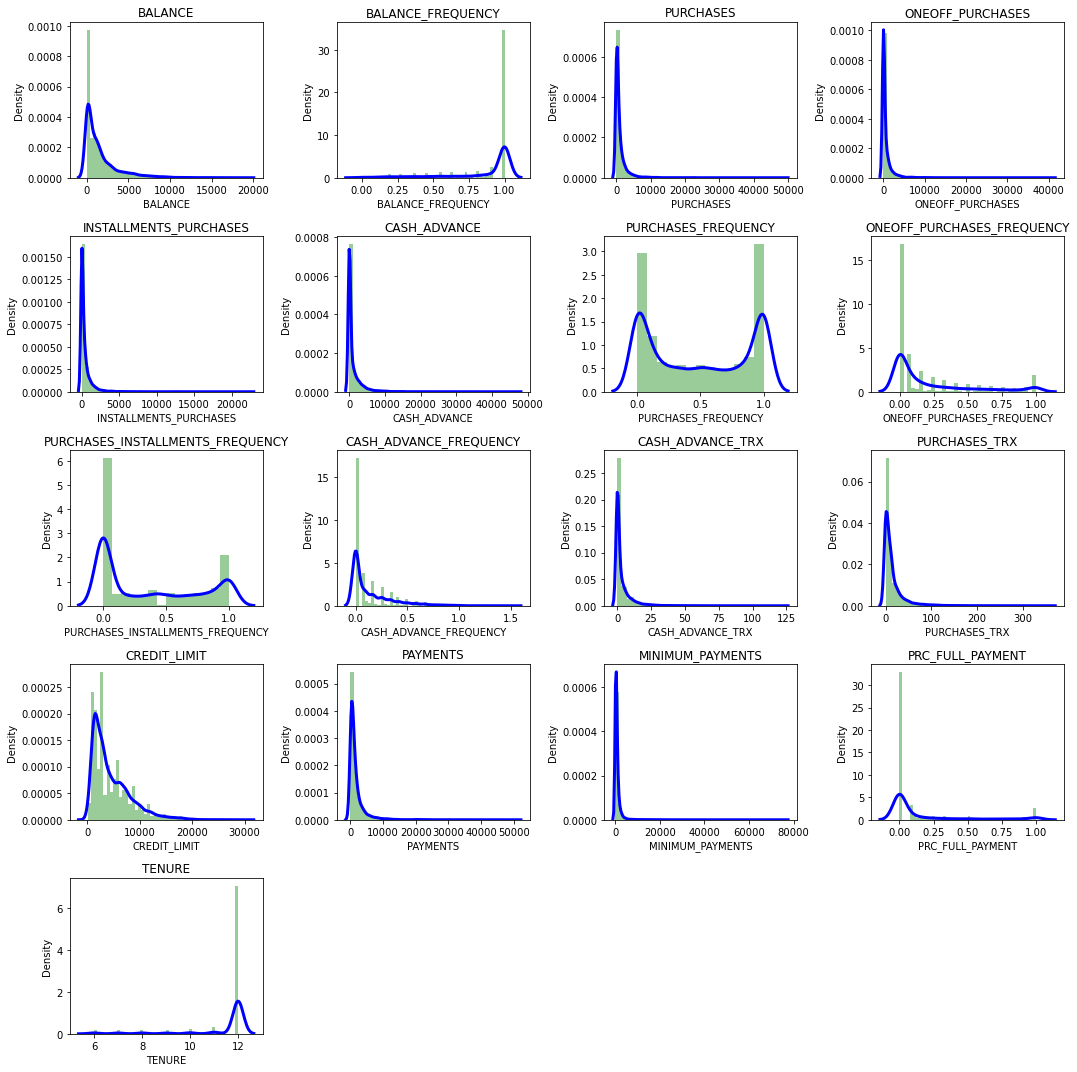

In [56]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (15,15)) 
for i in range(len(ds.columns)): 
    plt.subplot(5,4,i+1)    
    sns.distplot(ds[ds.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"}) 
    plt.title(ds.columns[i]) 
plt.tight_layout()

In [57]:
correlations=ds.corr() 

<AxesSubplot:>

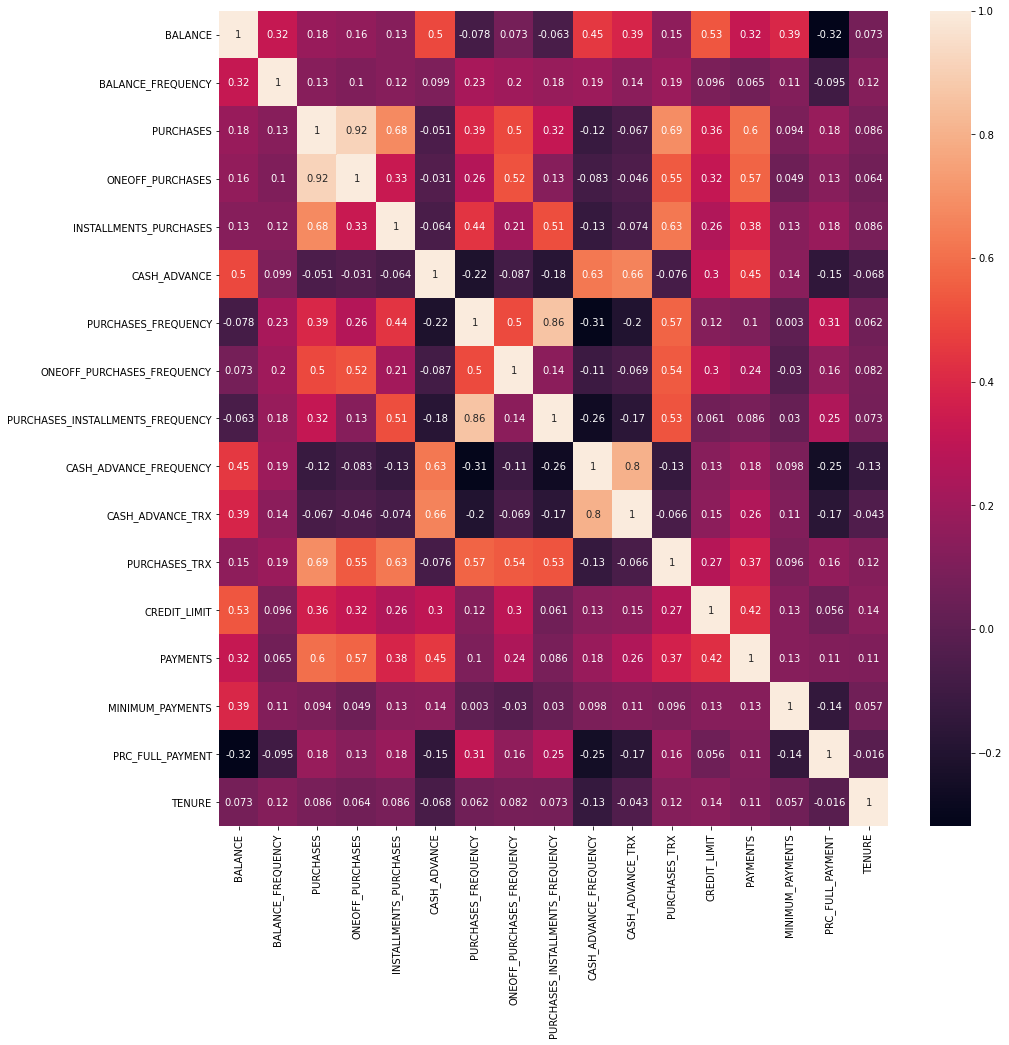

In [58]:
f,ax=plt.subplots(figsize=(15,15)) 
sns.heatmap(correlations, annot=True) 

In [59]:
scaler=StandardScaler() 
ds_scaled=scaler.fit_transform(ds) 

In [60]:
ds_scaled.shape 
ds_scaled 

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [61]:
scores_1=[]

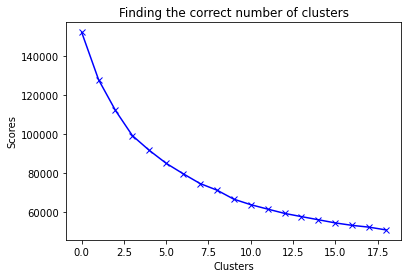

In [62]:
range_values=range(1,20) 
for i in range_values: 
    kmeans=KMeans(n_clusters=i) 
    kmeans.fit(ds_scaled) 
    scores_1.append(kmeans.inertia_) 
plt.plot(scores_1,'bx-') 
plt.title("Finding the correct number of clusters") 
plt.xlabel('Clusters') 
plt.ylabel('Scores') 
plt.show()

In [63]:
kmeans=KMeans(8) 
kmeans.fit(ds_scaled) 
labels=kmeans.labels_ 

In [64]:
kmeans.cluster_centers_ 

array([[-7.01091558e-01, -2.13845997e+00, -3.09767102e-01,
        -2.34182195e-01, -3.02090844e-01, -3.22644141e-01,
        -5.53598053e-01, -4.40043013e-01, -4.39844352e-01,
        -5.21763591e-01, -3.76479896e-01, -4.18559773e-01,
        -1.76243566e-01, -2.02001843e-01, -2.57019871e-01,
         2.83164561e-01,  2.01503907e-01],
       [-1.19235207e-01,  4.02732783e-01,  5.79633433e-01,
         7.04004732e-01,  7.69577280e-02, -3.31448472e-01,
         9.99041625e-01,  1.91775899e+00,  2.10366135e-01,
        -4.16815055e-01, -3.32537756e-01,  6.63442614e-01,
         4.69541022e-01,  1.72540811e-01, -1.56372273e-01,
         4.65502836e-01,  2.74766788e-01],
       [ 1.21380329e-02,  4.05108897e-01, -3.55102667e-01,
        -2.39328402e-01, -3.99836587e-01, -9.85346463e-02,
        -8.45150029e-01, -3.84107148e-01, -7.54261751e-01,
         9.65443455e-02, -3.40754872e-02, -4.78731762e-01,
        -3.03314442e-01, -2.52077716e-01, -7.82351474e-03,
        -4.55461972e-01,  2.7

In [65]:
kmeans.cluster_centers_.shape

(8, 17)

In [66]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[ds.columns]) 
cluster_centers.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701092,-2.138460,-0.309767,-0.234182,-0.302091,-0.322644,-0.553598,-0.440043,-0.439844,-0.521764,-0.376480,-0.418560,-0.176244,-0.202002,-0.257020,0.283165,0.201504
1,-0.119235,0.402733,0.579633,0.704005,0.076958,-0.331448,0.999042,1.917759,0.210366,-0.416815,-0.332538,0.663443,0.469541,0.172541,-0.156372,0.465503,0.274767
2,0.012138,0.405109,-0.355103,-0.239328,-0.399837,-0.098535,-0.845150,-0.384107,-0.754262,0.096544,-0.034075,-0.478732,-0.303314,-0.252078,-0.007824,-0.455462,0.273055
3,1.669404,0.390095,-0.221249,-0.157449,-0.233946,2.006144,-0.482682,-0.212973,-0.422983,1.918998,1.925983,-0.271367,1.015509,0.816635,0.507443,-0.390751,0.071837
4,-0.362883,0.330892,-0.033505,-0.240065,0.361628,-0.362361,0.990814,-0.378894,1.200056,-0.472651,-0.359942,0.190389,-0.262875,-0.213922,-0.051280,0.310471,0.255460


In [67]:
cluster_centers=scaler.inverse_transform(cluster_centers) 
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[ds.columns]) 
cluster_centers.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.211929,0.370689,341.382646,203.742891,137.890642,302.271277,0.268165,0.071184,0.189632,0.030734,0.679628,4.306002,3853.203250,1148.368309,265.232576,0.236535,11.786982
1,1316.296809,0.972674,2241.600597,1760.941034,480.659563,283.808183,0.891314,0.774562,0.448042,0.051735,0.979501,31.200535,6202.831794,2232.632594,499.787557,0.289866,11.885027
2,1589.739119,0.973237,244.522512,195.201241,49.500380,772.239356,0.151151,0.087871,0.064674,0.154464,3.016287,2.810351,3390.867415,1003.403563,845.974171,0.020500,11.882736
3,5039.198156,0.969681,530.502543,331.104880,199.513592,5185.849543,0.296627,0.138924,0.196333,0.519155,16.392246,7.964652,8189.286825,4097.222532,2046.782053,0.039427,11.613455
4,809.164590,0.955656,931.620183,193.978468,738.083058,218.982410,0.888012,0.089426,0.841370,0.040562,0.792490,19.442194,3538.004052,1113.860877,744.700022,0.244522,11.859190


In [68]:
labels.shape 

(8950,)

In [69]:
labels.max()

7

In [70]:
labels.min()

0

In [71]:
labels

array([2, 3, 1, ..., 7, 7, 7])

In [72]:
ds_cluster=pd.concat([ds,pd.DataFrame({"cluster":labels})],axis=1)

In [73]:
ds_cluster.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


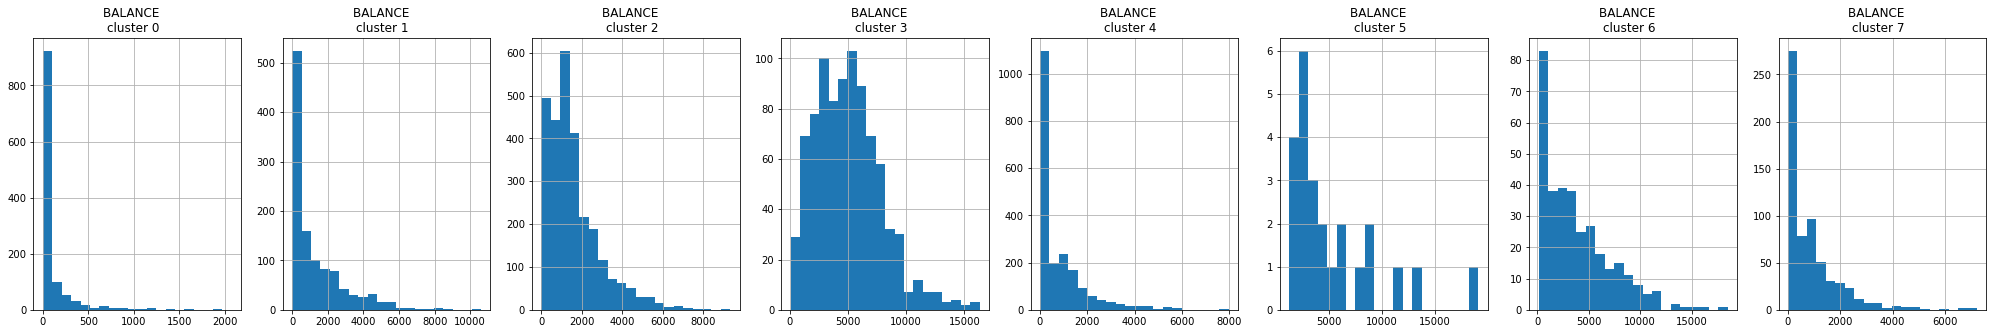

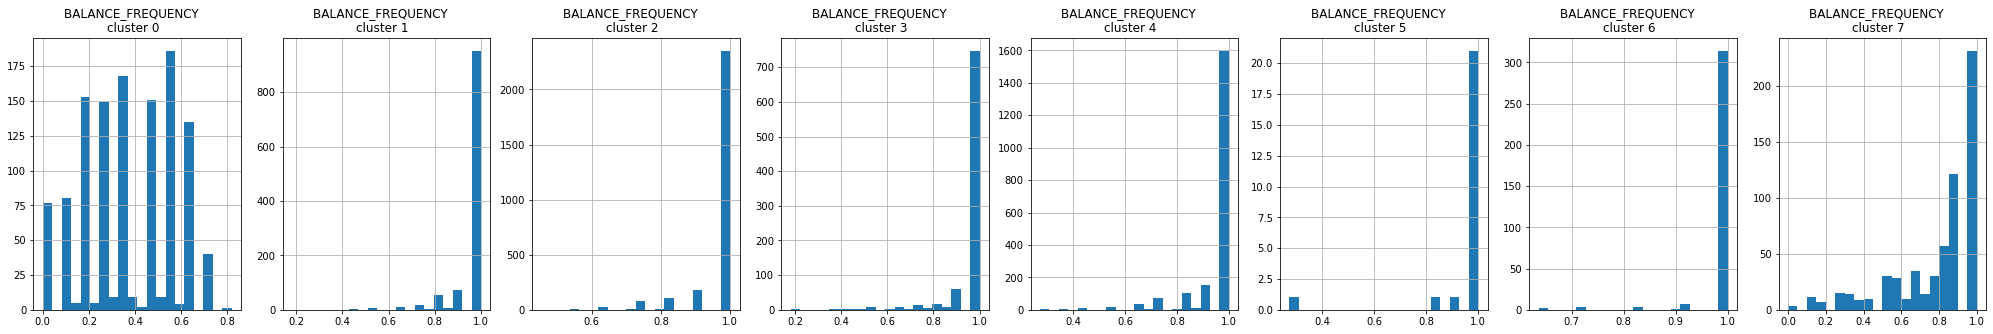

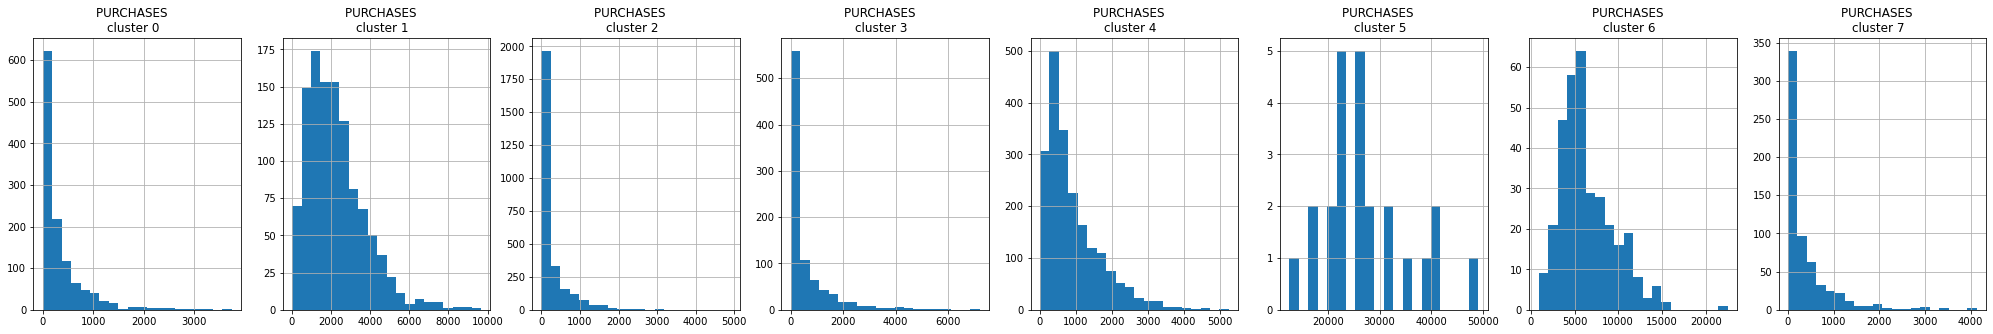

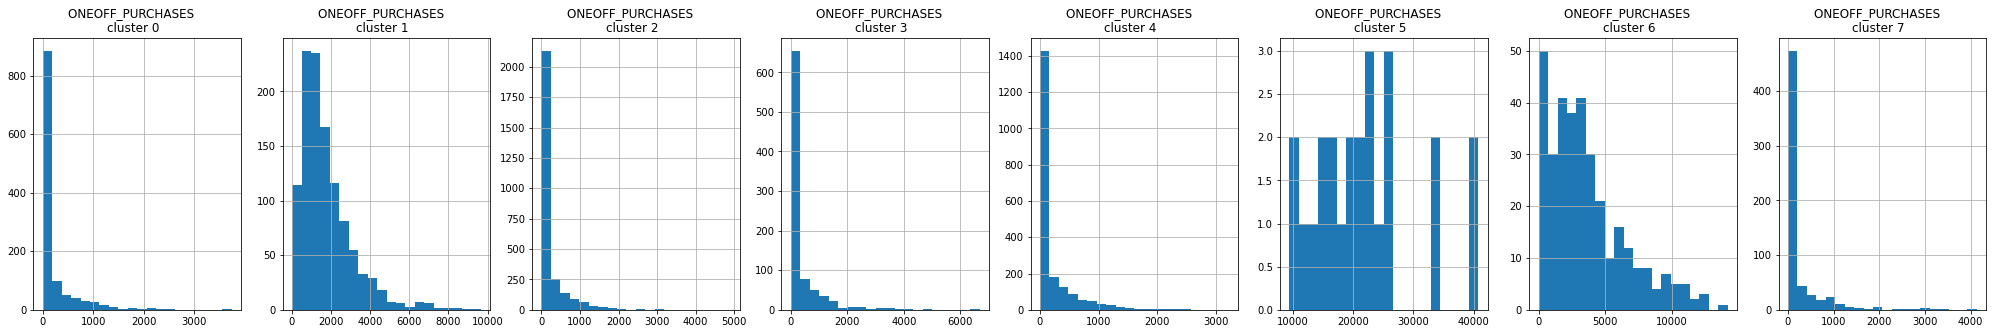

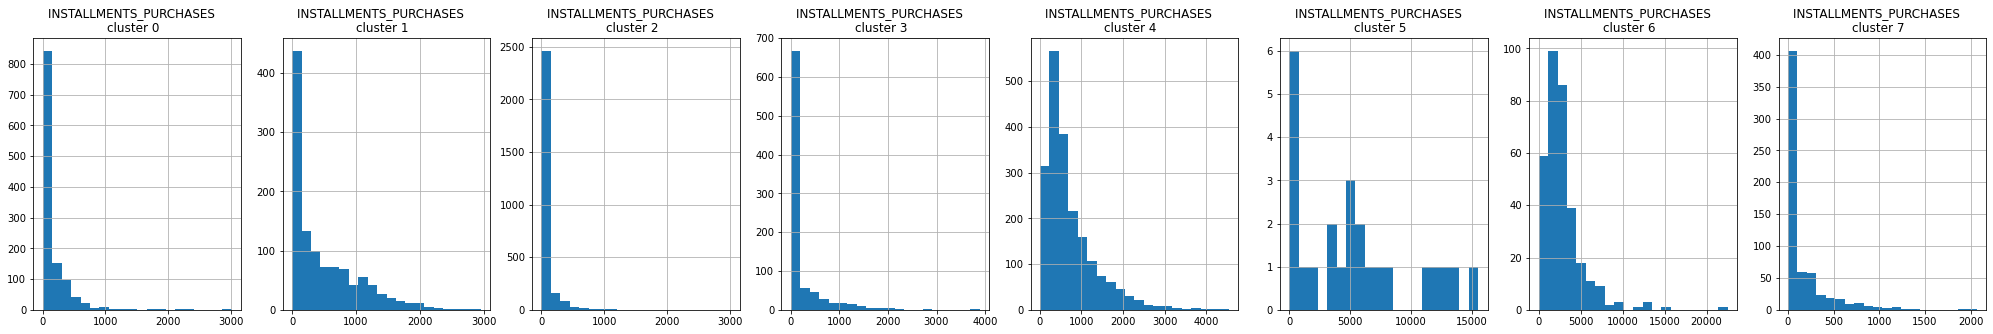

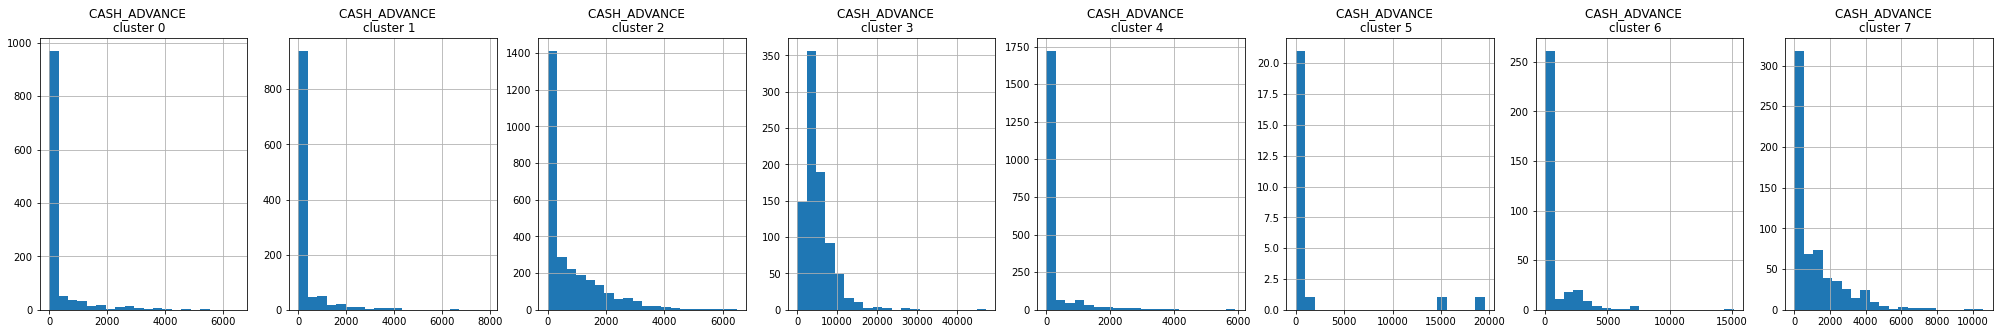

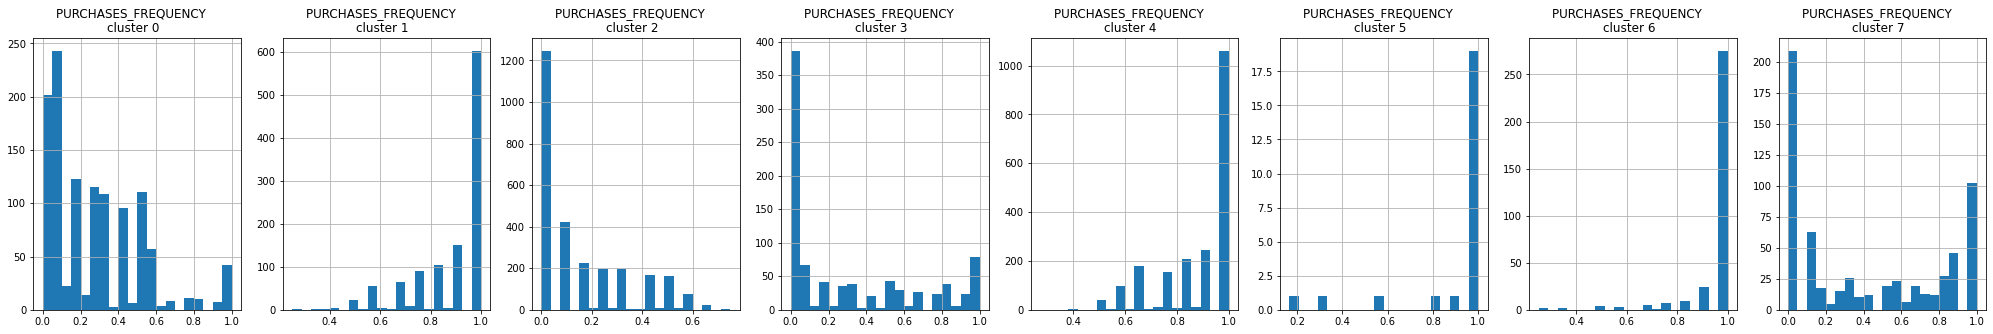

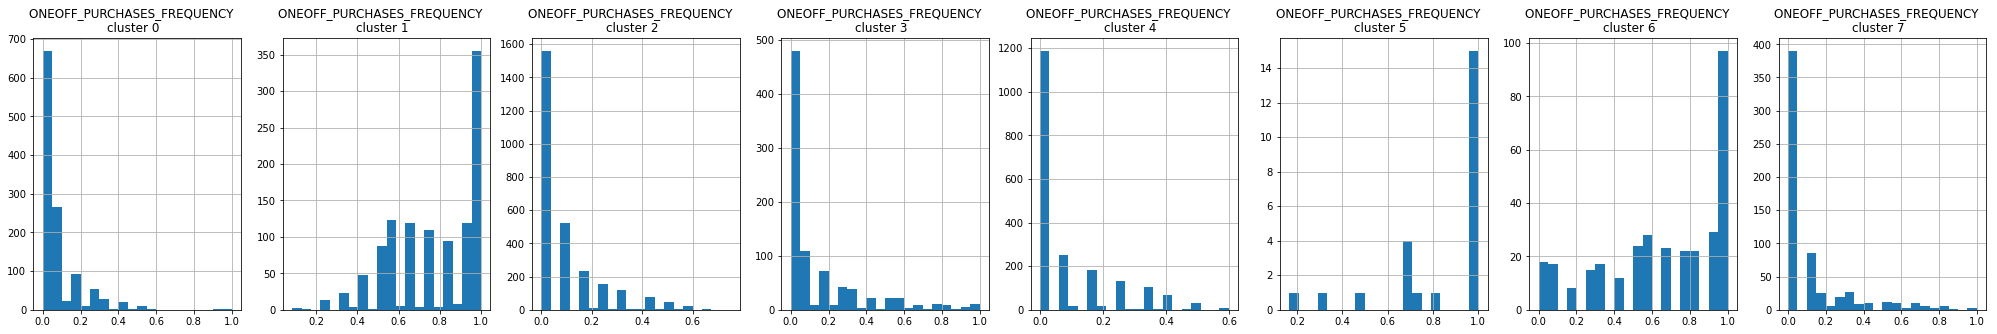

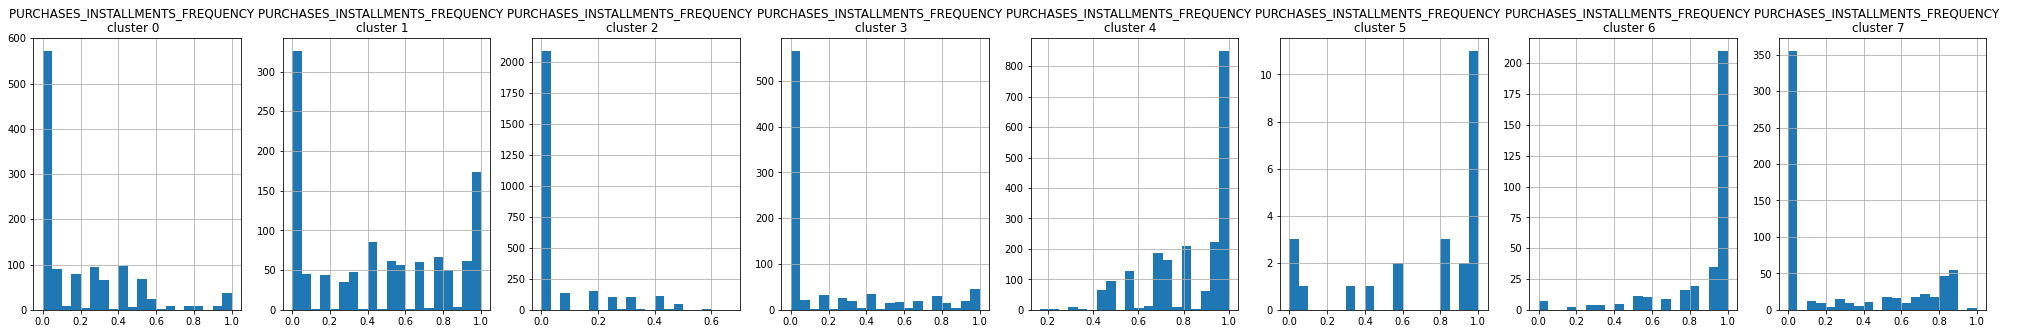

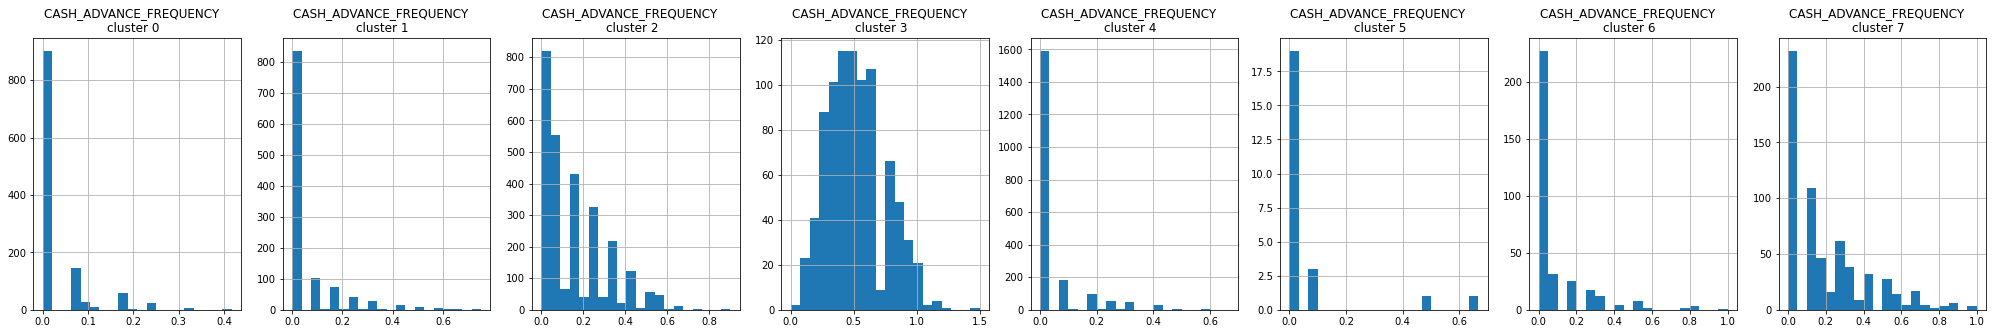

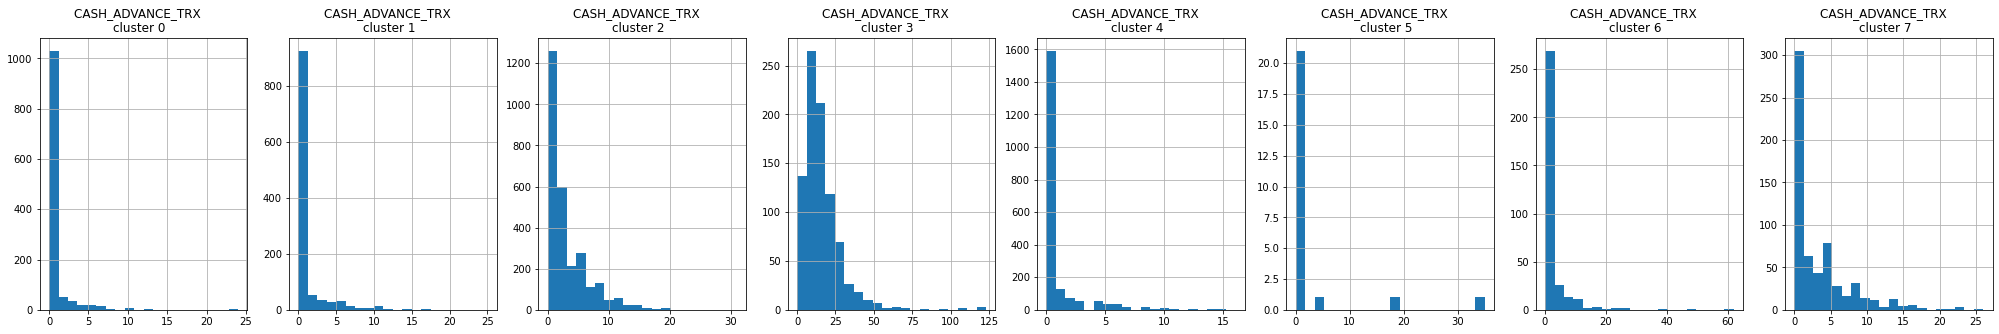

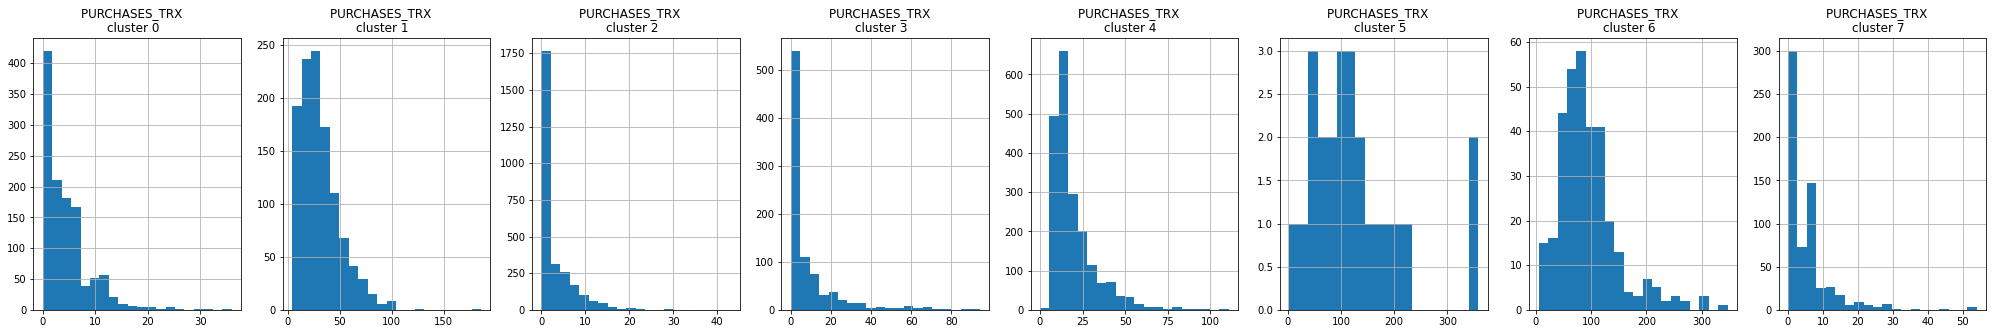

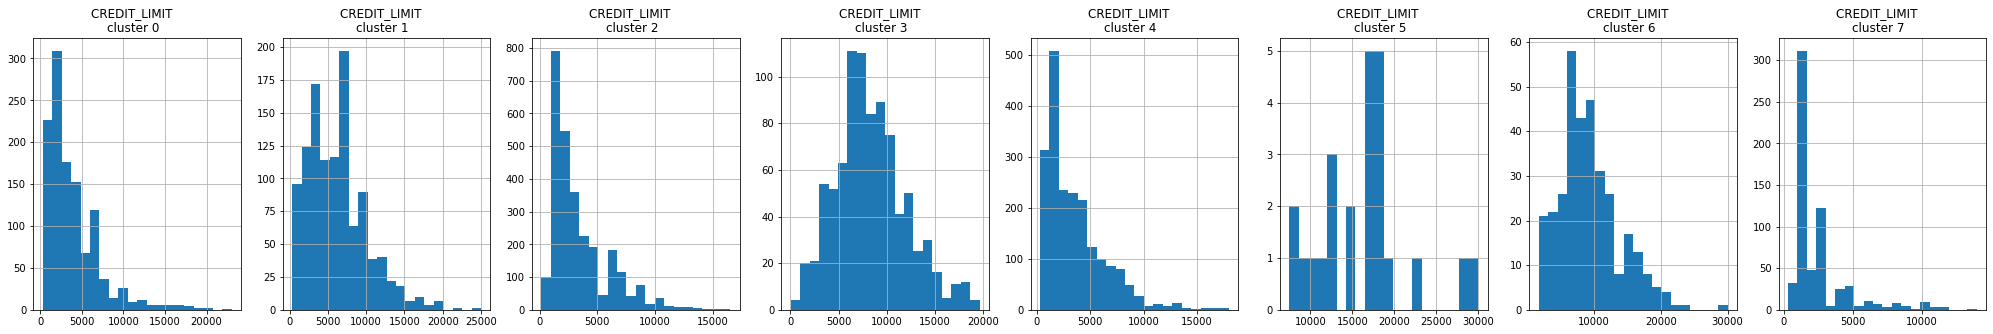

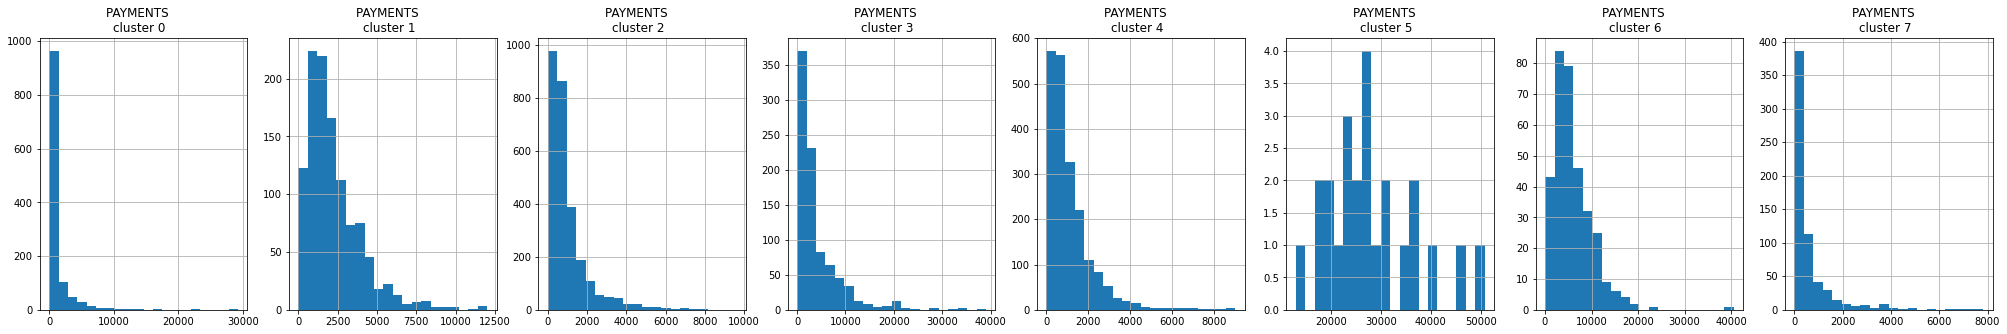

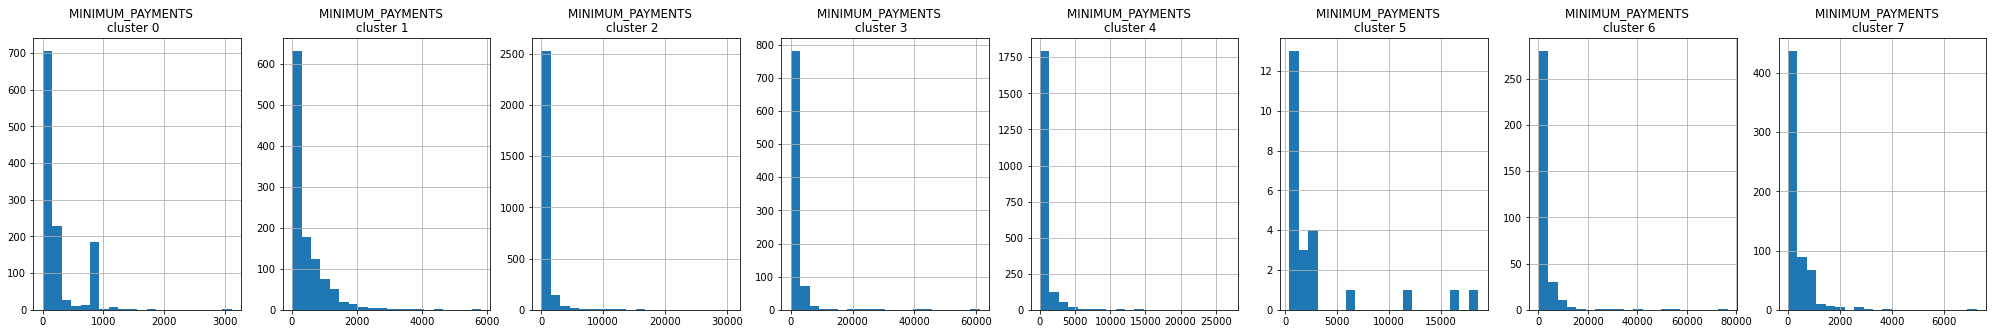

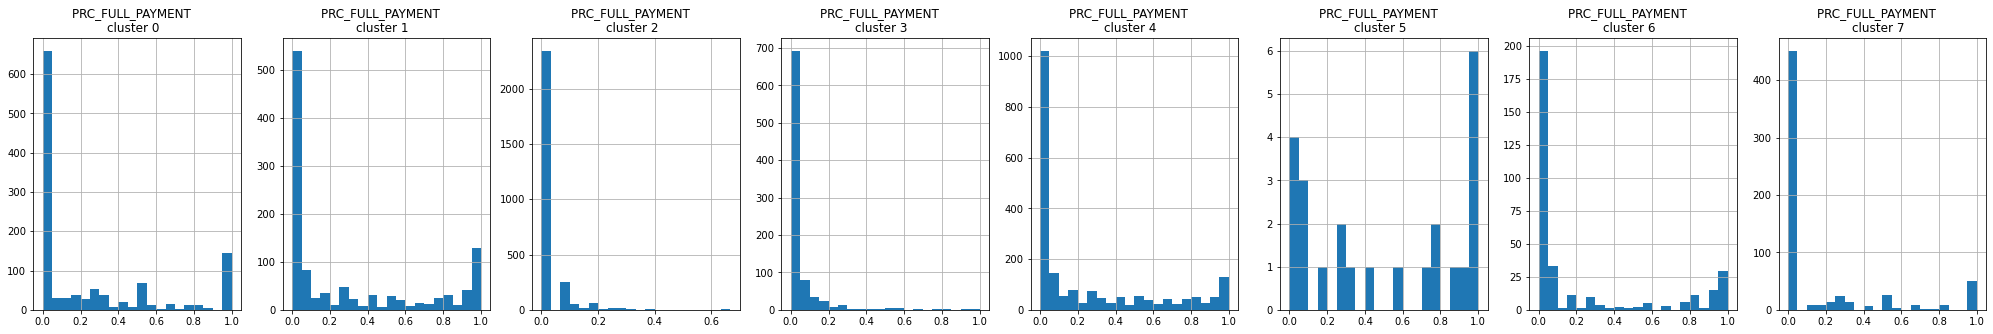

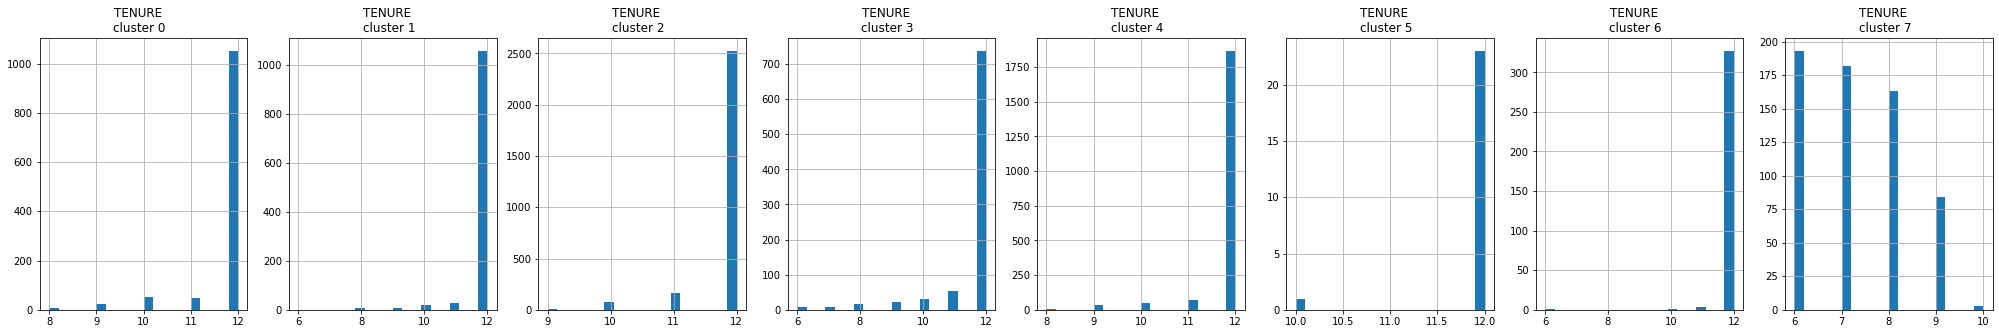

In [74]:
for i in ds.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=ds_cluster[ds_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}   \ncluster {}  '.format(i,j))
plt.show()

In [75]:
pca=PCA(n_components=2) 
principal_comp=pca.fit_transform(ds_scaled)  
principal_comp

array([[-1.68222395, -1.07646066],
       [-1.13828679,  2.50650702],
       [ 0.96963407, -0.38369431],
       ...,
       [-0.92621165, -1.81081087],
       [-2.336538  , -0.65791755],
       [-0.55641776, -0.40045863]])

In [76]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2']) 
pca_df.head() 

,pca1,pca2
0,-1.682224,-1.076461
1,-1.138287,2.506507
2,0.969634,-0.383694
3,-0.873629,0.043165
4,-1.599437,-0.688590


In [77]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1) 
pca_df.head() 

,pca1,pca2,cluster
0,-1.682224,-1.076461,2
1,-1.138287,2.506507,3
2,0.969634,-0.383694,1
3,-0.873629,0.043165,2
4,-1.599437,-0.688590,2


In [78]:
pca_df 

,pca1,pca2,cluster
0,-1.682224,-1.076461,2
1,-1.138287,2.506507,3
2,0.969634,-0.383694,1
3,-0.873629,0.043165,2
4,-1.599437,-0.688590,2
...,...,...,...
8945,-0.359636,-2.016165,7
8946,-0.564394,-1.639205,7
8947,-0.926212,-1.810811,7
8948,-2.336538,-0.657918,7


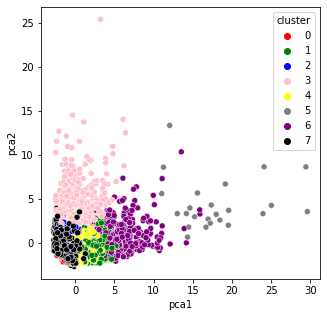

In [79]:
plt.figure(figsize=(5,5)) 
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df, 
palette=['red','green','blue','pink','yellow','gray','purple','black']) 
plt.show()